In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
df = pd.concat([
    pd.read_csv('../tmp2.csv'), 
    pd.read_csv('../tmp3.csv')
])

In [35]:
df = pd.read_csv('../tmp1.csv')

In [36]:
df.edge_count.unique()

array([   2000,    5000,   15000,   25000,   50000,   10000,   75000,
        125000,  250000,   20000,  150000,  500000,  100000,  750000,
       1250000, 2500000,  200000, 1500000, 5000000])

In [37]:
ns = [1000, 5000, 10000, 50000, 100000]
# ns = [500000, 1000000]
# ns = [500000,]

params = {}
for n in ns:
    params[n] = []
    for factor in [2, 5, 15, 25, 50]:
        params[n].append(n*factor)

In [38]:
params

{1000: [2000, 5000, 15000, 25000, 50000],
 5000: [10000, 25000, 75000, 125000, 250000],
 10000: [20000, 50000, 150000, 250000, 500000],
 50000: [100000, 250000, 750000, 1250000, 2500000],
 100000: [200000, 500000, 1500000, 2500000, 5000000]}

1000 2000
1000 5000
1000 15000
1000 25000
1000 50000
5000 10000
5000 25000
5000 75000
5000 125000
5000 250000
10000 20000
10000 50000
10000 150000
10000 250000
10000 500000
50000 100000
50000 250000
50000 750000
50000 1250000
50000 2500000
100000 200000
100000 500000
100000 1500000
100000 2500000
100000 5000000
25


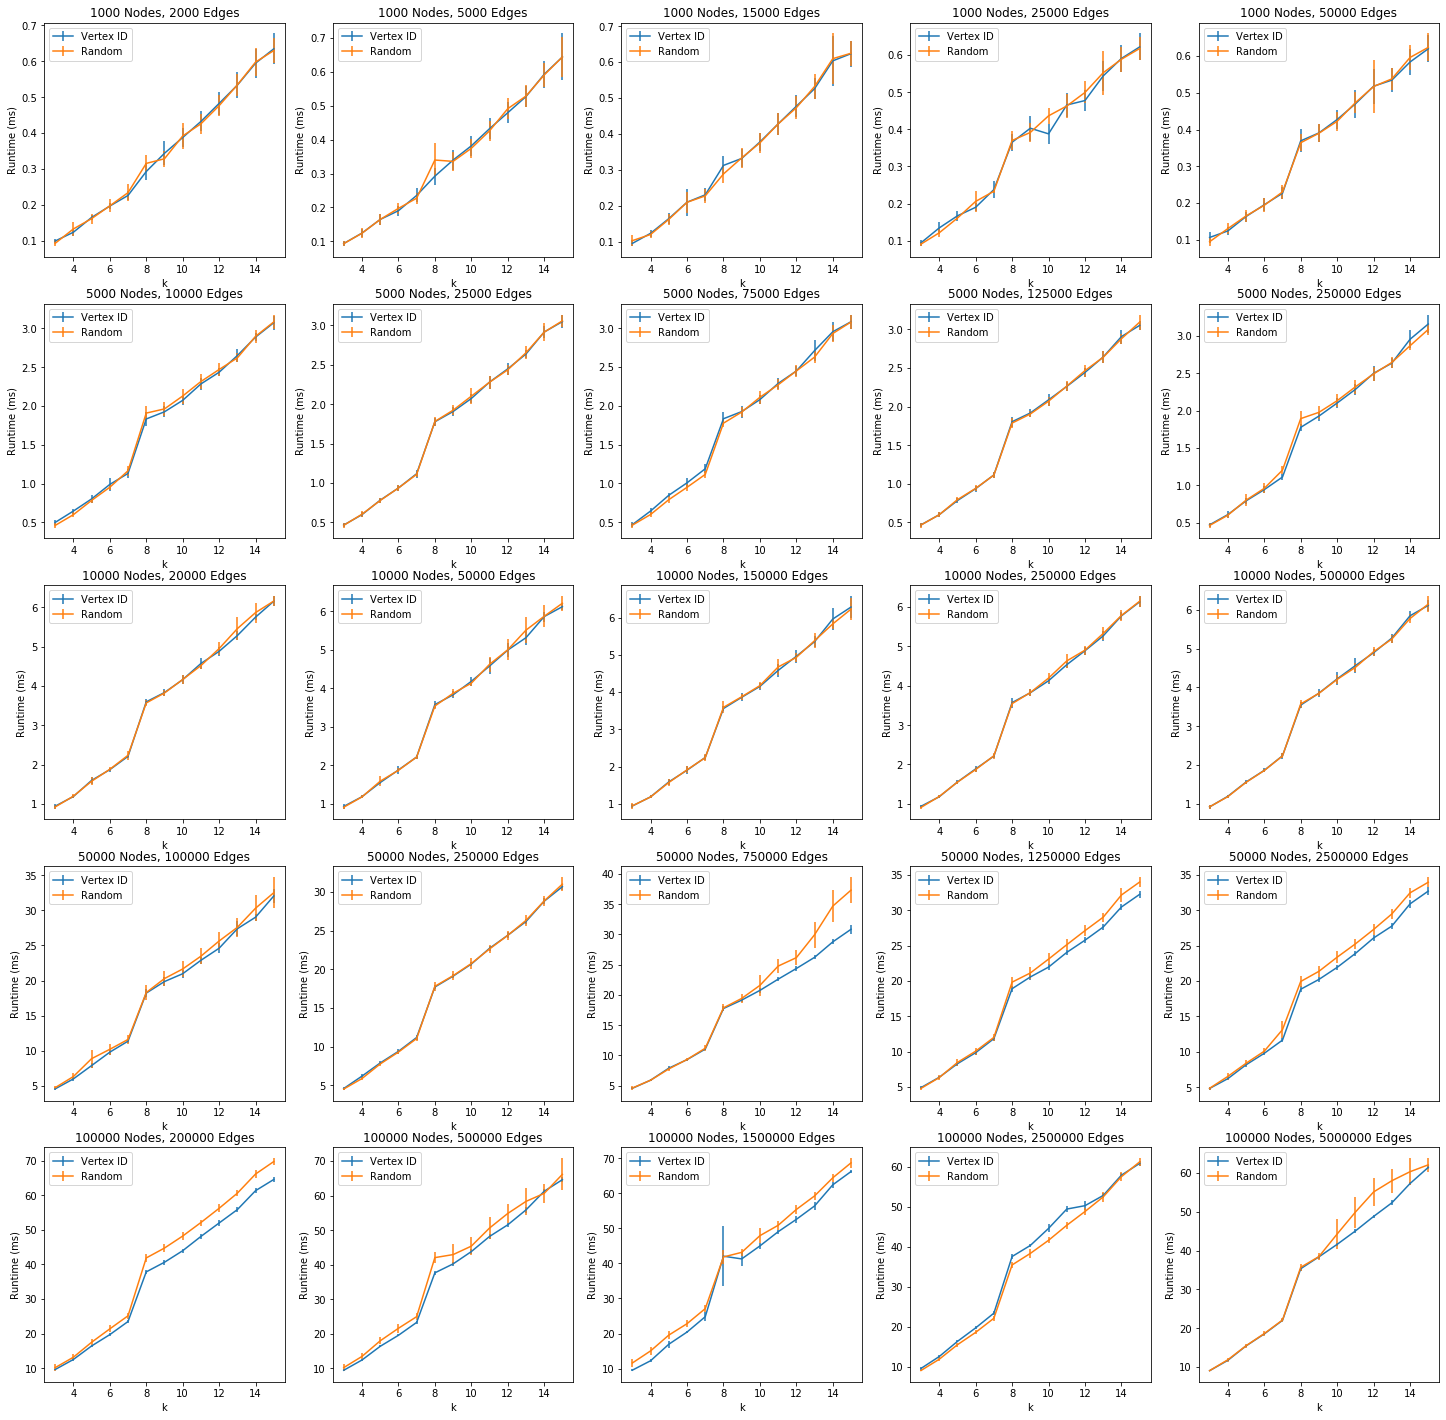

In [41]:
# fig, axs = plt.subplots(5, 1, figsize=(5,25))        
fig, axs = plt.subplots(5, 5, figsize=(25,25))        

i = 0
for n_nodes, n_edges_list in params.items():
    for n_edges in n_edges_list:
        print(n_nodes, n_edges)
        d = df.loc[(df['node_count'] == n_nodes) & (df['edge_count'] == n_edges)]     
        
        x1 = d.loc[d['order'] == 'vid'].k.values
        y1 = d.loc[d['order'] == 'vid']['mean'].values
        yerr1 = d.loc[d['order'] == 'vid']['stdev'].values

        x2 = d.loc[d['order'] == 'random'].k.values
        y2 = d.loc[d['order'] == 'random']['mean'].values
        yerr2 = d.loc[d['order'] == 'random']['stdev'].values
        
        ax = axs.flatten()[i]
        
        ax.errorbar(x1, y1, yerr1, label='Vertex ID')
        ax.errorbar(x2, y2, yerr2, label='Random')
        ax.set_xlabel('k')
        ax.set_ylabel('Runtime (ms)')
        title_str = f"{n_nodes} Nodes, {n_edges} Edges"
        ax.set_title(title_str)
        ax.legend()
        
        i+=1
plt.savefig('1000-100000_1.png', dpi=150)
print(i)

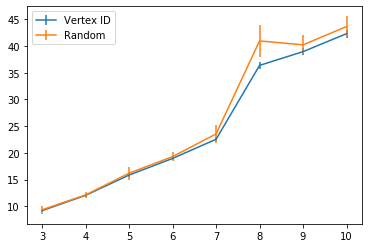

In [19]:
d.loc[d['order'] == 'random']

,Unnamed: 0,node_count,edge_count,order,k,mean,stdev
392,392,100000,5000000,random,3,9.367424,0.779742
393,393,100000,5000000,random,4,12.146180,0.550572
394,394,100000,5000000,random,5,16.201393,1.177590
395,395,100000,5000000,random,6,19.306638,0.901877
396,396,100000,5000000,random,7,23.548100,1.654006
397,397,100000,5000000,random,8,40.940003,2.962032
398,398,100000,5000000,random,9,40.209812,1.794777
399,399,100000,5000000,random,10,43.628628,1.928379


In [18]:
import numpy as np

In [34]:
def getIndexOfMax(array, start, length):
    print(array)
    if (length == 1):
        return start;
    
    nextLength = length / 2;
    mid = start + nextLength;
    print(start, length, nextLength, mid)
    maxLeftIdx = getIndexOfMax(array, start, nextLength);
    maxRightIdx = getIndexOfMax(array, mid, length - nextLength);
    if (array[maxLeftIdx] > array[maxRightIdx]):
        return maxLeftIdx;
    else:
        return maxRightIdx;
    

In [36]:
# Your function works, sorry!
# However, your pseudocode doesn't ensure that you are only using integers to index into `array`. i.e. by using floor(), or int().
# Your java code does this, but pseudocode does not.

In [35]:
inp = [3, 4, 1, 200, 3, 4, 7 ,0, -1]
res = getIndexOfMax(inp, 0, len(inp))

[3, 4, 1, 200, 3, 4, 7, 0, -1]
0 9 4.5 4.5
[3, 4, 1, 200, 3, 4, 7, 0, -1]
0 4.5 2.25 2.25
[3, 4, 1, 200, 3, 4, 7, 0, -1]
0 2.25 1.125 1.125
[3, 4, 1, 200, 3, 4, 7, 0, -1]
0 1.125 0.5625 0.5625
[3, 4, 1, 200, 3, 4, 7, 0, -1]
0 0.5625 0.28125 0.28125
[3, 4, 1, 200, 3, 4, 7, 0, -1]
0 0.28125 0.140625 0.140625
[3, 4, 1, 200, 3, 4, 7, 0, -1]
0 0.140625 0.0703125 0.0703125
[3, 4, 1, 200, 3, 4, 7, 0, -1]
0 0.0703125 0.03515625 0.03515625
[3, 4, 1, 200, 3, 4, 7, 0, -1]
0 0.03515625 0.017578125 0.017578125
[3, 4, 1, 200, 3, 4, 7, 0, -1]
0 0.017578125 0.0087890625 0.0087890625
[3, 4, 1, 200, 3, 4, 7, 0, -1]
0 0.0087890625 0.00439453125 0.00439453125
[3, 4, 1, 200, 3, 4, 7, 0, -1]
0 0.00439453125 0.002197265625 0.002197265625
[3, 4, 1, 200, 3, 4, 7, 0, -1]
0 0.002197265625 0.0010986328125 0.0010986328125
[3, 4, 1, 200, 3, 4, 7, 0, -1]
0 0.0010986328125 0.00054931640625 0.00054931640625
[3, 4, 1, 200, 3, 4, 7, 0, -1]
0 0.00054931640625 0.000274658203125 0.000274658203125
[3, 4, 1, 200, 3, 4, 7, 0,

RecursionError: maximum recursion depth exceeded while calling a Python object

In [33]:
res

3